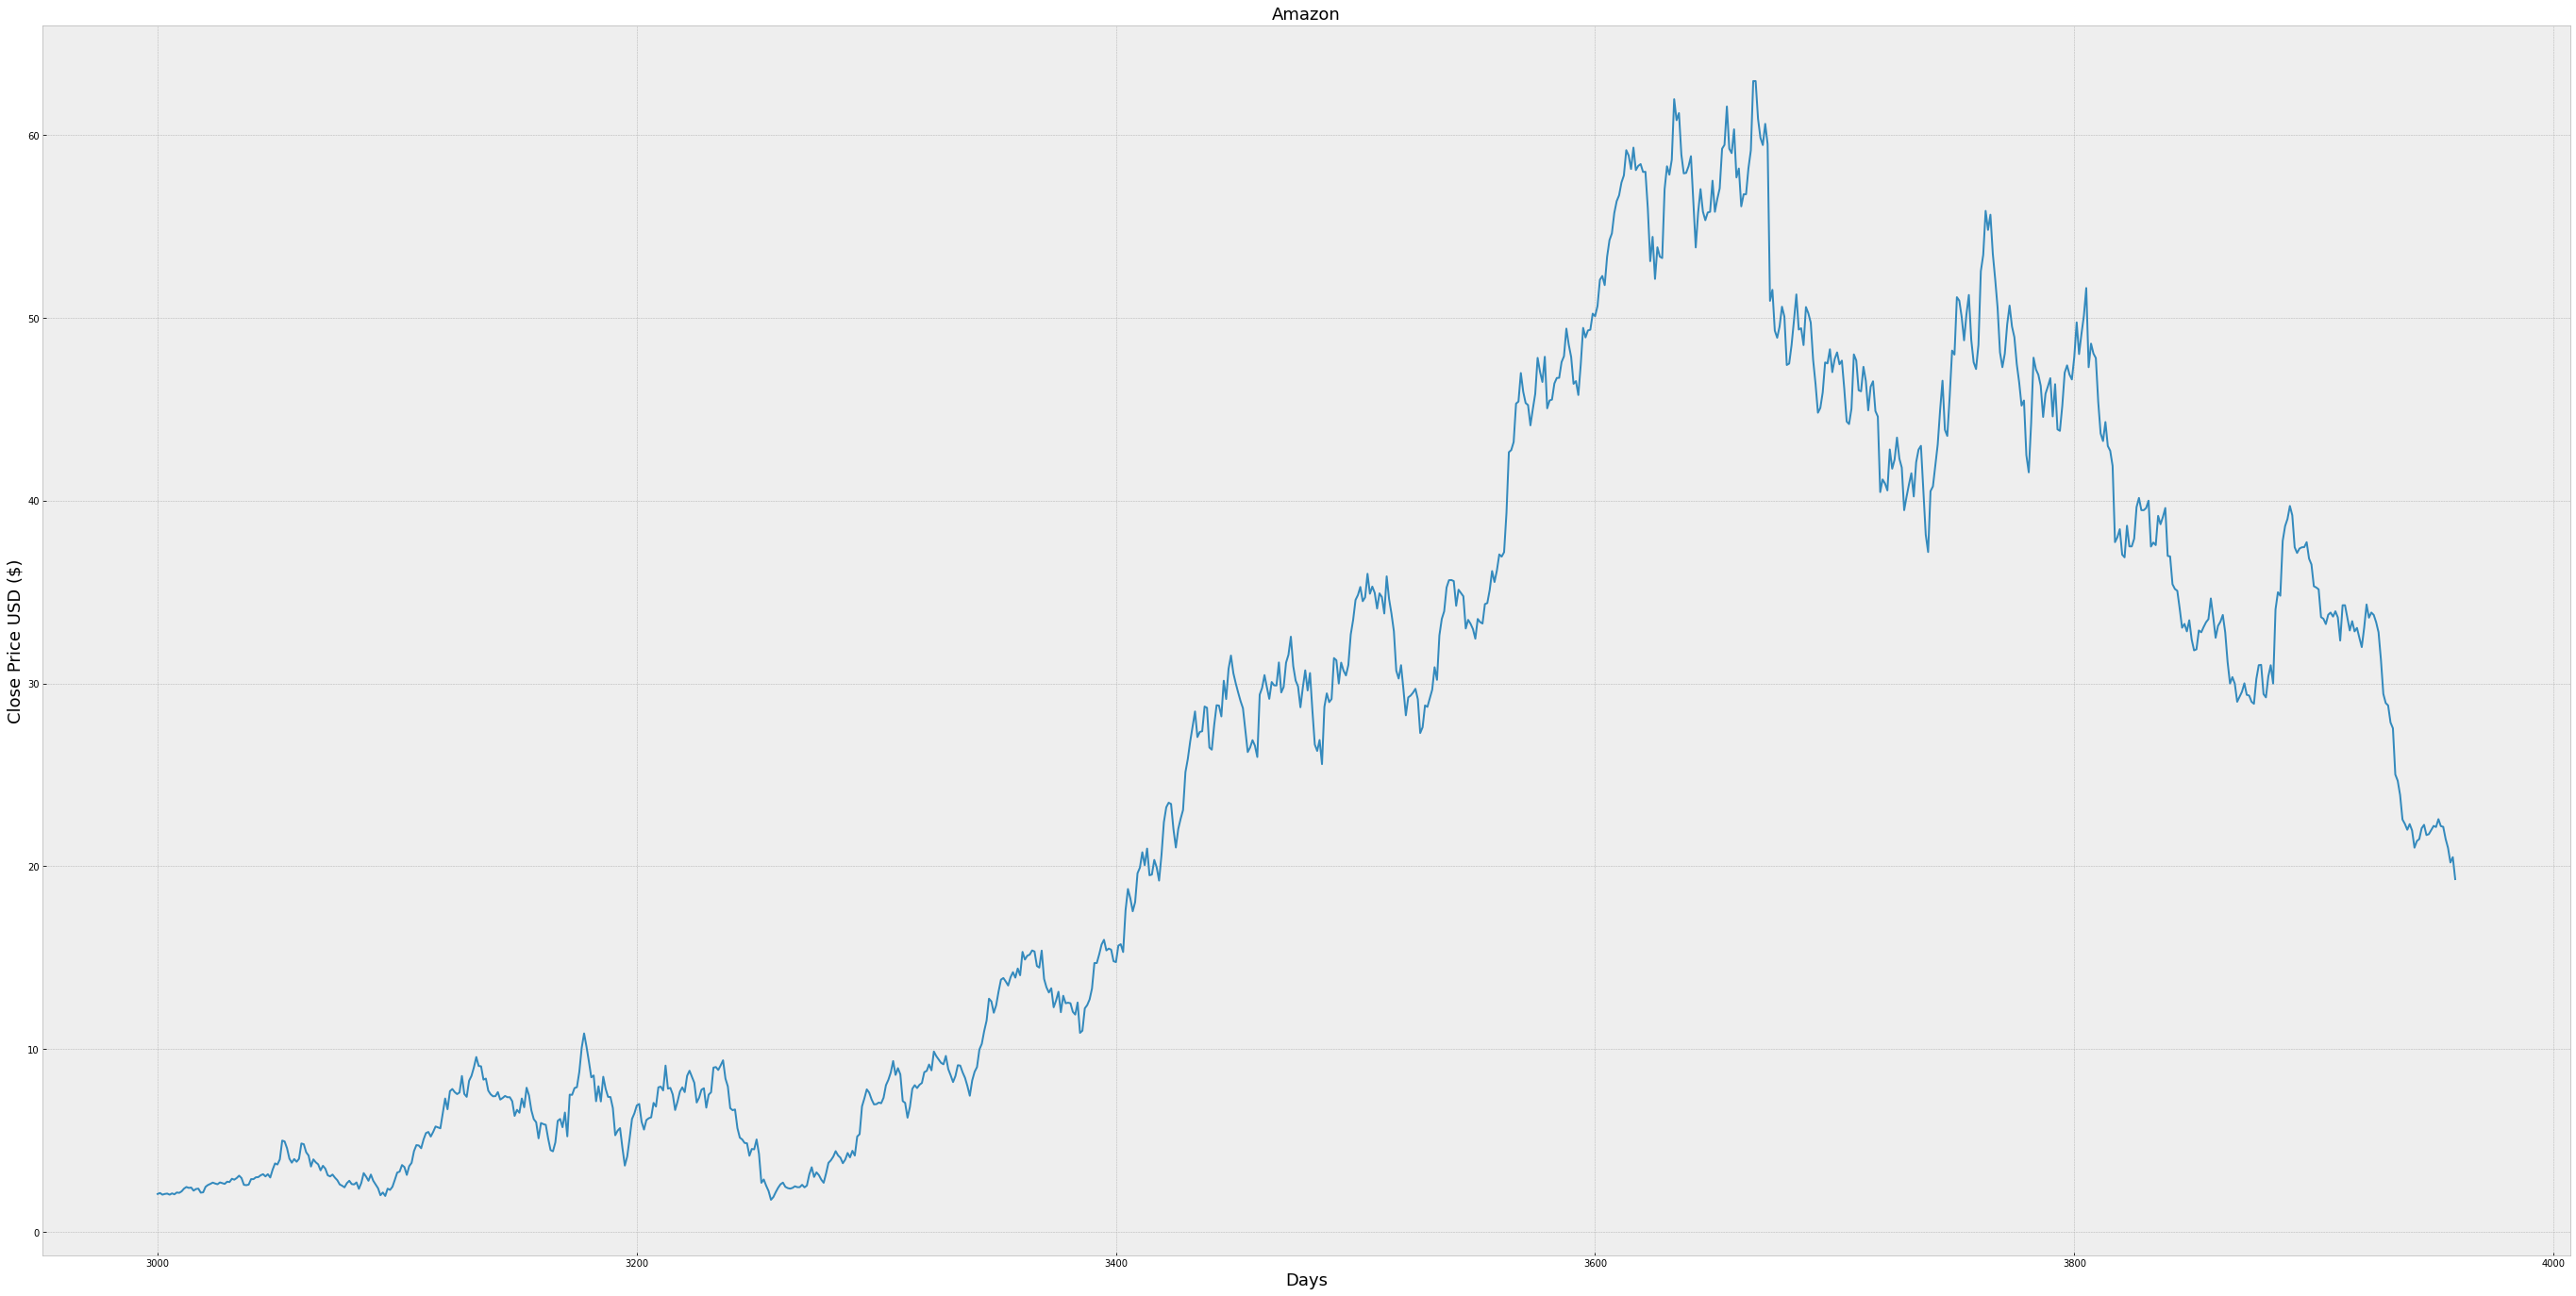

[[ 2.08]
 [ 2.13]
 [ 2.04]
 [ 2.08]
 [ 2.1 ]
 [ 2.04]
 [ 2.11]
 [ 2.06]
 [ 2.16]
 [ 2.14]
 [ 2.22]
 [ 2.37]
 [ 2.46]
 [ 2.41]
 [ 2.43]
 [ 2.26]
 [ 2.35]
 [ 2.37]
 [ 2.15]
 [ 2.17]
 [ 2.47]
 [ 2.57]
 [ 2.63]
 [ 2.7 ]
 [ 2.65]
 [ 2.61]
 [ 2.71]
 [ 2.67]
 [ 2.63]
 [ 2.75]
 [ 2.73]
 [ 2.91]
 [ 2.86]
 [ 2.95]
 [ 3.08]
 [ 2.95]
 [ 2.58]
 [ 2.56]
 [ 2.59]
 [ 2.89]
 [ 2.89]
 [ 2.99]
 [ 3.  ]
 [ 3.1 ]
 [ 3.16]
 [ 3.04]
 [ 3.16]
 [ 2.98]
 [ 3.41]
 [ 3.75]
 [ 3.69]
 [ 3.97]
 [ 5.  ]
 [ 4.95]
 [ 4.58]
 [ 4.01]
 [ 3.79]
 [ 3.99]
 [ 3.84]
 [ 4.  ]
 [ 4.84]
 [ 4.8 ]
 [ 4.36]
 [ 4.18]
 [ 3.58]
 [ 3.97]
 [ 3.81]
 [ 3.7 ]
 [ 3.37]
 [ 3.62]
 [ 3.46]
 [ 3.1 ]
 [ 3.04]
 [ 3.14]
 [ 2.97]
 [ 2.83]
 [ 2.6 ]
 [ 2.53]
 [ 2.44]
 [ 2.67]
 [ 2.8 ]
 [ 2.62]
 [ 2.6 ]
 [ 2.71]
 [ 2.36]
 [ 2.68]
 [ 3.22]
 [ 3.03]
 [ 2.8 ]
 [ 3.14]
 [ 2.8 ]
 [ 2.59]
 [ 2.39]
 [ 2.01]
 [ 2.16]
 [ 1.97]
 [ 2.37]
 [ 2.3 ]
 [ 2.47]
 [ 2.85]
 [ 3.25]
 [ 3.3 ]
 [ 3.66]
 [ 3.55]
 [ 3.12]
 [ 3.6 ]
 [ 3.78]
 [ 4.42]
 [ 4.75]
 [ 4.73]
 [ 4.58]
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


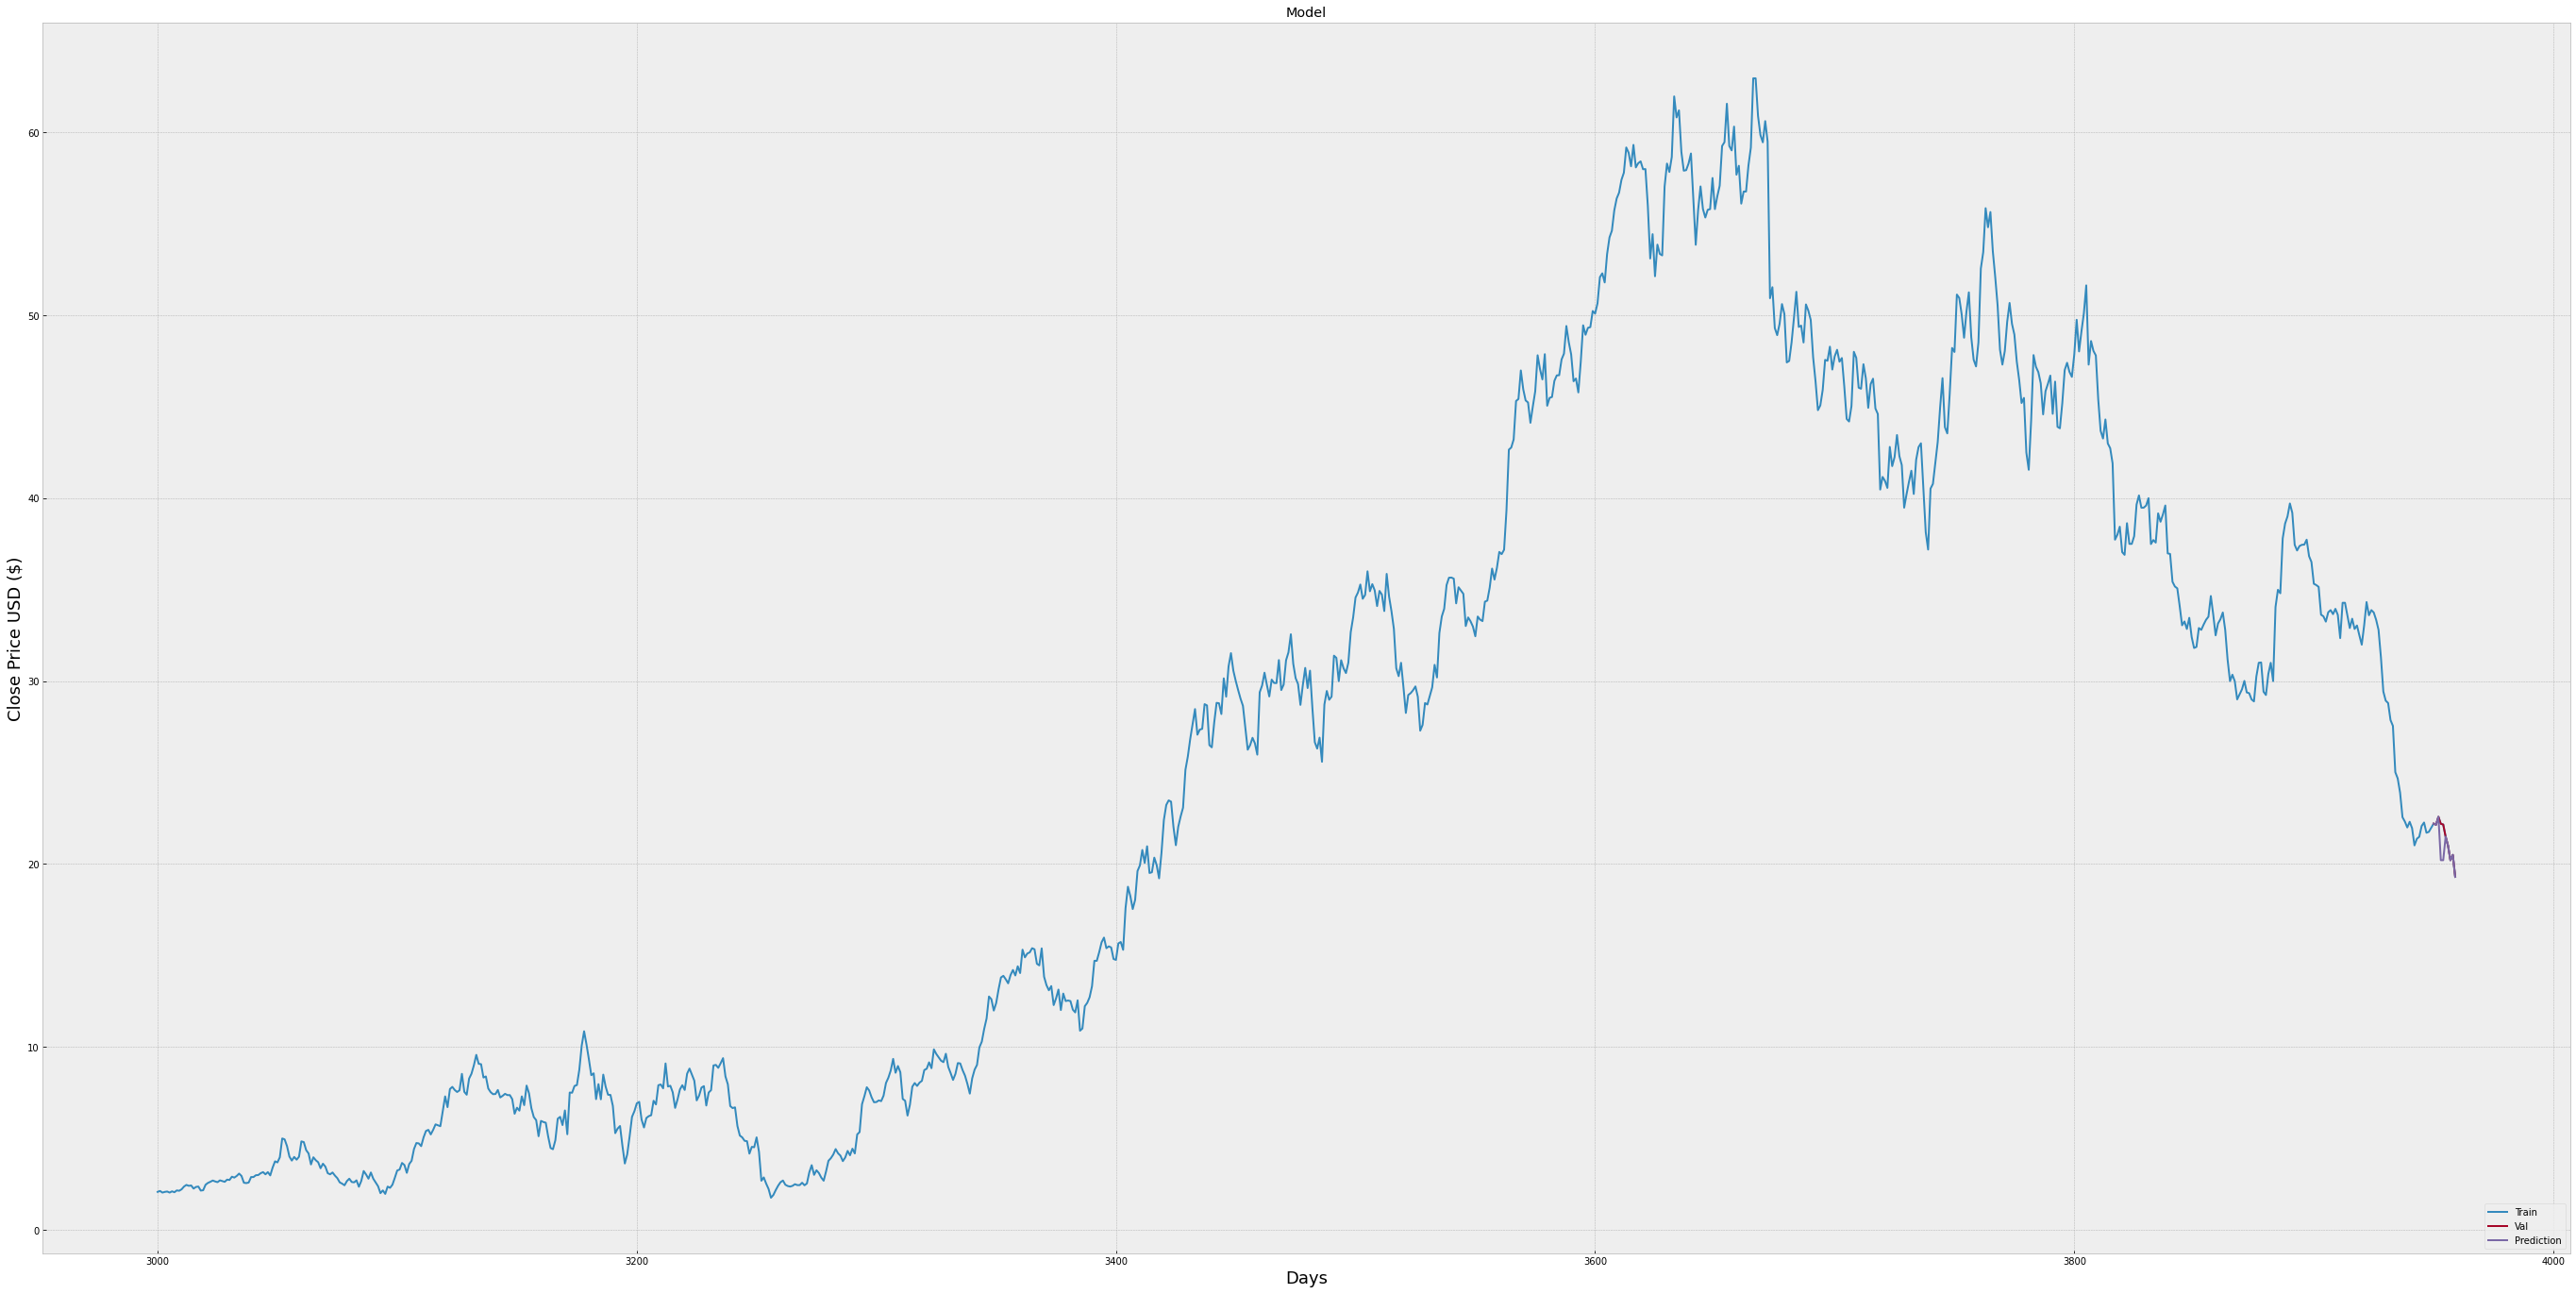

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


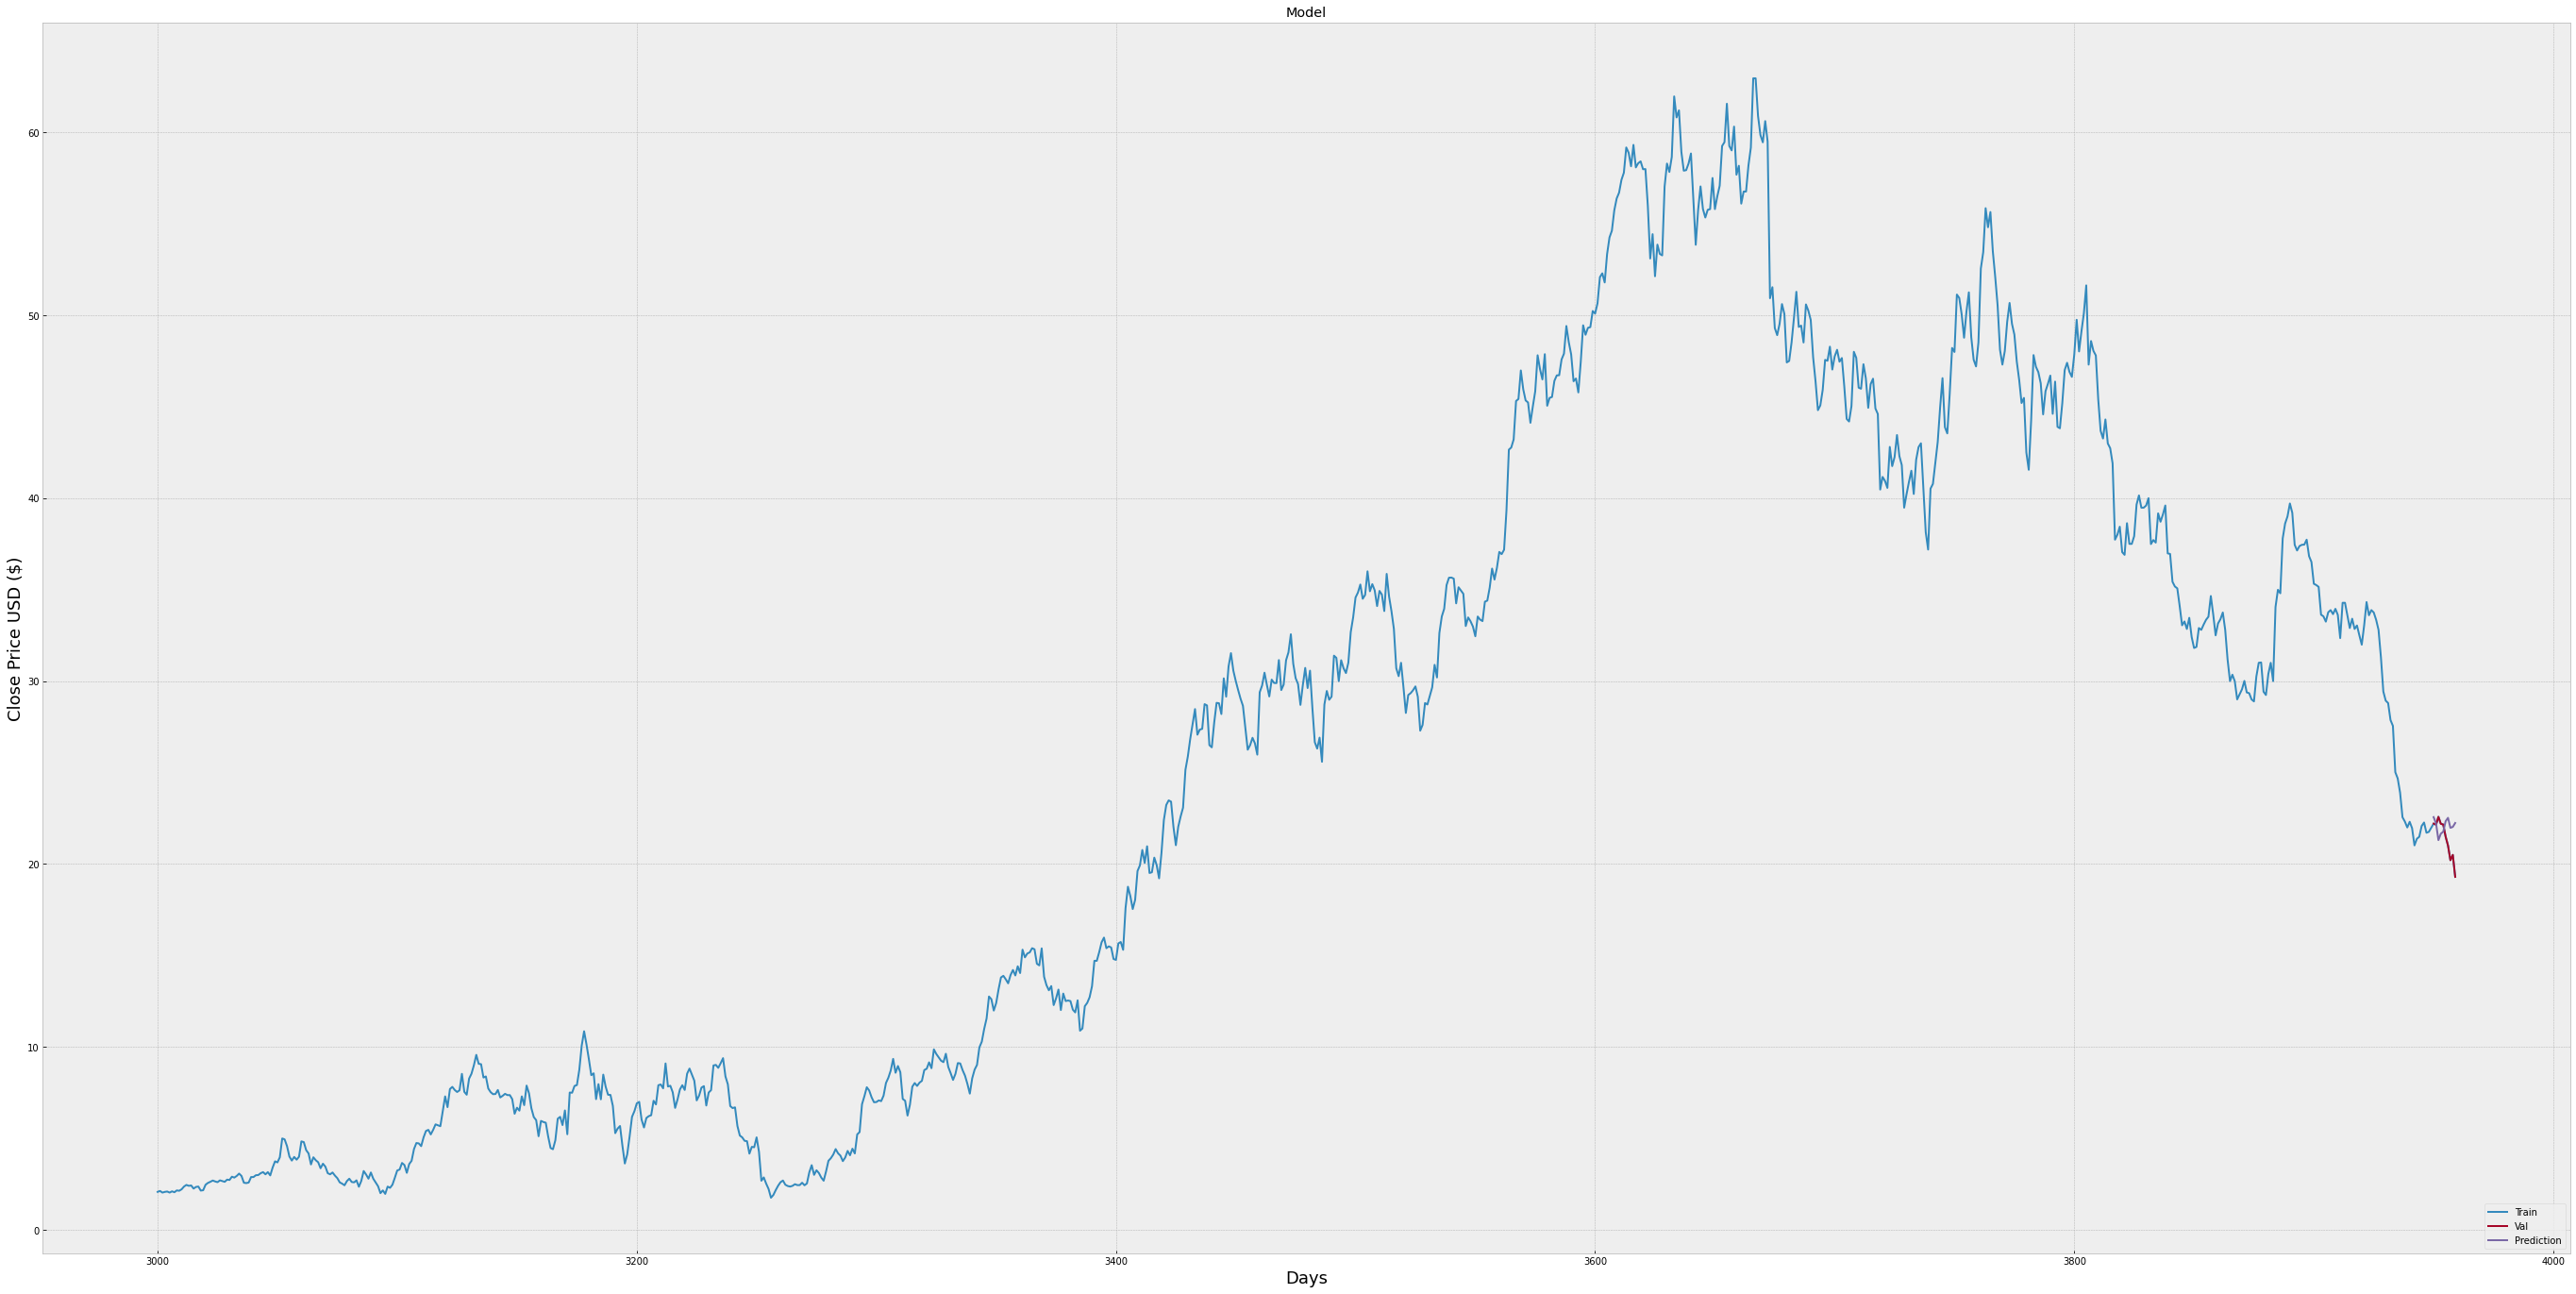

In [3]:
#This programs attempts to predict the price of Netflix stock.
# api key: "HXFFE4IZUVLA5GEU"



#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab

df = pd.read_csv('stock_market_data-AAL.csv')
df = df[3000:]
df.head(6)


plt.figure(figsize=(48,24))
plt.title('Amazon', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

df = df[['Close']]
df.head(4)


#Create a variable to predict 'x' days out into the future
future_days = 10
#Create a new column (the target or dependent variable) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.tail(4)


X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)
y = np.array(df['Prediction'])[:-future_days]
print(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)


#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future


#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)


#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(48,24))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()


#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(48,24))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()